In [16]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.gaussian_process.kernels import RBF
from matplotlib import pyplot as plt
%matplotlib inline


In [17]:
delta = 0.1
x_coord = np.arange(-5.0, 5.0, delta)
y_coord = np.arange(-5.0, 5.0, delta)
x_coord, y_coord = np.meshgrid(x_coord, y_coord)

In [18]:
X, y = make_moons(n_samples=100, noise=0.2, random_state=0)
X = X*2
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

{'alpha': 0.1, 'coef0': 1, 'degree': 3, 'gamma': None, 'kernel': 'precomputed', 'kernel_params': None}


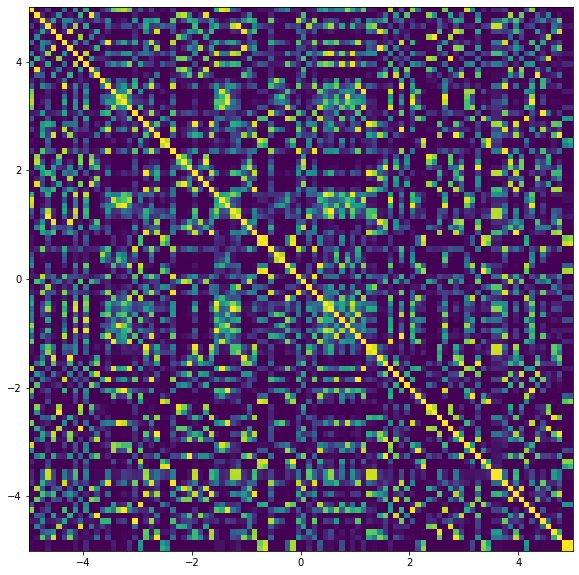

In [19]:
kr = KernelRidge(alpha=0.1, kernel='precomputed')
kernel = RBF(length_scale=1)
K = kernel.__call__(X)
kr.fit(K, y)
#r.gamma = 0
#kr.kernel = RBF(length_scale=0.3)
print(kr.get_params())

p, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(K, extent=[-5, 5, -5, 5])

[]

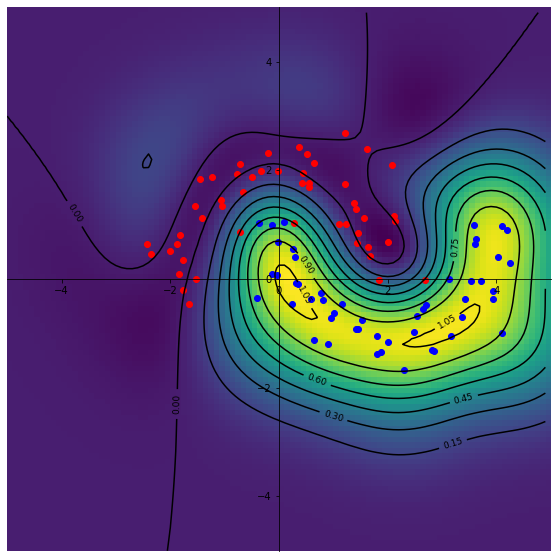

In [20]:
X0 = X[y <= 0]
X1 = X[y > 0]

samples = np.ndarray((x_coord.shape[0], x_coord.shape[1]))
for i in range(x_coord.shape[0]):
    for j in range(x_coord.shape[1]):
        sample = np.asarray([[x_coord[i][j], y_coord[i][j]]])
        prediction = kr.predict(kernel.__call__(sample, Y=X))
        #print("Prediction: ", prediction)
        samples[i][j] = prediction

p, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(X0[:, 0], X0[:, 1], color='red')
ax.scatter(X1[:, 0], X1[:, 1], color='blue')
con = ax.contour(x_coord, y_coord, samples, colors="k")
ax.clabel(con, fontsize=9, inline=True)
ax.imshow(np.flip(samples, axis=0), extent=[-5, 5, -5, 5])
#ax.plot(x, y_t, c='green')

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.plot()